In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [18]:
def gamblers_ruin(_k, _n, T):
    """
    Plot the probabilities of either achieving a total fortune of n or losing all money. 

    @params:
        - _k: starting dollar amount
        - _n: goal dollar amount
    """

    # Prepare transition matrix
    P = []
    for j in range(_n):
        row = []
        if j == 0:
            row.append(1)
            for k in range(_n - 1):
                row.append(0)
        elif j == _n - 1:
            for k in range(_n - 1):
                row.append(0)
            row.append(1)
        else:
            for k in range(_n):
                if (j + 1) % _n == k:
                    row.append(1/2)
                elif (j - 1) % _n == k:
                    row.append(1/2)
                else:
                    row.append(0)
        P.append(row)

    print(P)

    mu_0 = np.zeros(_n)
    mu_0[_k-1] = 1

    print(mu_0)
    
    # Plotting the probabilities of winning or losing the gambler's ruin 

    ts = range(0, T)
    ys = []
    for t in ts:
        P_t = np.linalg.matrix_power(P, t)
        y   = mu_0.dot(P_t)
        ys.append([y[_n-1], y[0]])
        
    plt.plot(ys)
    plt.xticks(range(0, T, T//5))
    plt.legend(["Winning probability", "Losing probability"])
    plt.show()
    
    # print("The probability of staying on the east lilipad should converge to", q, "/(", p, "+", q, ") = ", q / (p+q))

[[1, 0, 0, 0, 0], [0.5, 0, 0.5, 0, 0], [0, 0.5, 0, 0.5, 0], [0, 0, 0.5, 0, 0.5], [0, 0, 0, 0, 1]]
[0. 0. 0. 0. 1.]


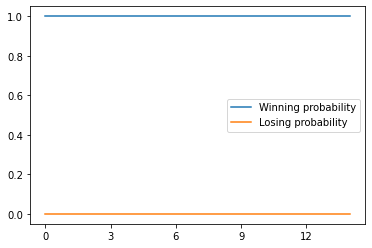

In [21]:
gamblers_ruin(5, 15, 15)